# Question 1
---

In [6]:
P_A = 0.9  # Probability of passing the class
P_Ac = 1 - P_A  # Probability of not passing the class
P_B_given_A = 0.6  # Probability of answering quickly given passing
P_B_given_Ac = 0.3  # Probability of answering quickly given not passing

# Applying Bayes' Theorem
P_A_given_B = (P_B_given_A * P_A) / ((P_B_given_A * P_A) + (P_B_given_Ac * P_Ac))

# Print the result
print(f"Proportion of students who pass given they answer quickly: {P_A_given_B:.3f}")

Proportion of students who pass given they answer quickly: 0.947


# Question 2
---
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

What is the posterior distribution?
Answer: A Dirichlet

With which updated parameters?
Answer: α + x

What is the prior?
Answer: A Dirichlet with parameter α

# Question 3
---

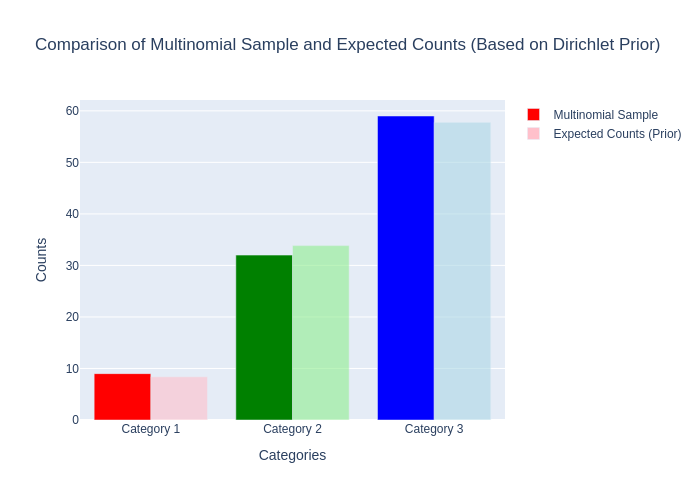

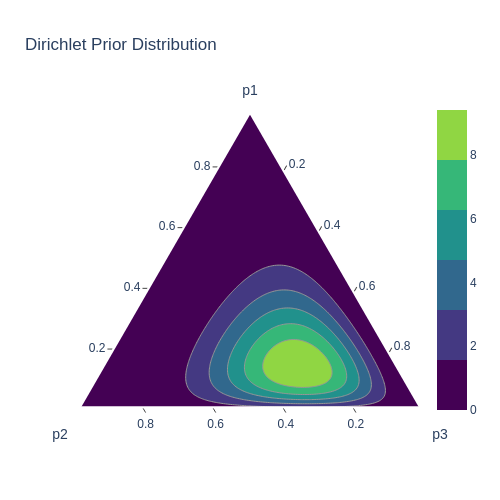

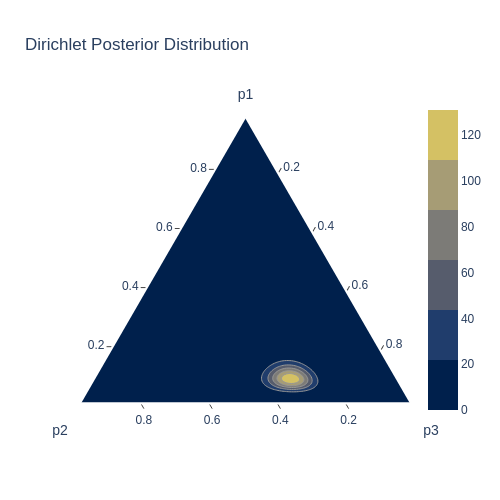

In [7]:
import numpy as np
from scipy.stats import multinomial, dirichlet
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Parameters
categories = 3
n_trials = 100  # Number of trials for the multinomial
alpha_prior = np.array([2.0, 3.0, 5.0])  # Dirichlet prior

# Step 1: Generate probabilities from Dirichlet prior
true_probs = dirichlet.rvs(alpha_prior, size=1)[0]

# Step 2: Sample from the Multinomial Distribution
sample = multinomial.rvs(n=n_trials, p=true_probs, size=1)[0]

# Step 3: Update the Dirichlet Posterior
alpha_posterior = alpha_prior + sample

# Step 4: Visualize Multinomial Sample and Expected Counts
fig = go.Figure()

# Multinomial Sample
fig.add_trace(go.Bar(
    x=[f"Category {i+1}" for i in range(categories)],
    y=sample,
    name="Multinomial Sample",
    marker=dict(color=['red', 'green', 'blue'])
))

# Expected Counts (Dirichlet prior probabilities scaled by n_trials)
fig.add_trace(go.Bar(
    x=[f"Category {i+1}" for i in range(categories)],
    y=true_probs * n_trials, 
    name="Expected Counts (Prior)",
    marker=dict(color=['pink', 'lightgreen', 'lightblue'], opacity=0.6)
))

fig.update_layout(
    title="Comparison of Multinomial Sample and Expected Counts (Based on Dirichlet Prior)",
    xaxis_title="Categories",
    yaxis_title="Counts",
    barmode='group'
)
fig.show("png")

# Step 5: Visualize Dirichlet Distributions on a Simplex
# Generate grid points for Dirichlet density
n_points = 200
p1 = np.linspace(0, 1, n_points)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, n_points)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Remove invalid points where p1 + p2 + p3 > 1
valid_indices = (p1 >= 0) & (p2 >= 0) & (p3 >= 0)
p = p[valid_indices]

# Compute densities
prior_densities = dirichlet(alpha_prior).pdf(p.T)
posterior_densities = dirichlet(alpha_posterior).pdf(p.T)

# Visualize Dirichlet Prior
fig_prior = ff.create_ternary_contour(
    np.array([p[:, 0], p[:, 1], p[:, 2]]),
    prior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale="Viridis",
    showscale=True,
    title=dict(text="Dirichlet Prior Distribution")
)
fig_prior.show("png")

# Visualize Dirichlet Posterior
fig_posterior = ff.create_ternary_contour(
    np.array([p[:, 0], p[:, 1], p[:, 2]]),
    posterior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale="Cividis",
    showscale=True,
    title=dict(text="Dirichlet Posterior Distribution")
)
fig_posterior.show("png")
